In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
col_names=['class','age','menopause','tumor_size','inv_nodes','node-caps','deg-malig','breast','breaset-quad','target']
df = pd.read_csv('breastcancer.csv',names=col_names)


In [3]:
df

,class,age,menopause,tumor_size,inv_nodes,node-caps,deg-malig,breast,breaset-quad,target
0,0,30-39,0,30-34,0-2,0,3,0,0,0
1,0,40-49,0,20-24,0-2,0,2,1,3,0
2,0,40-49,0,20-24,0-2,0,2,0,0,0
3,0,60-69,1,15-19,0-2,0,2,1,1,0
4,0,40-49,0,0-4,0-2,0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...
281,1,30-39,0,30-34,0-2,0,2,0,1,0
282,1,30-39,0,20-24,0-2,0,3,0,1,1
283,1,60-69,1,20-24,0-2,0,1,1,1,0
284,1,40-49,1,30-34,03-May,0,3,0,0,0


In [4]:
df['menopause'].unique()

array([0, 1, 2], dtype=int64)

In [5]:
#df.tumor_size.str.split(expand=True,)
df[['lt','ht']] = df.tumor_size.str.split("-",expand=True,)
df[['sa','ea']]= df.age.str.split('-',expand=True,)
df[['ins','ine']]= df.inv_nodes.str.split('-',expand=True,)
df

,class,age,menopause,tumor_size,inv_nodes,node-caps,deg-malig,breast,breaset-quad,target,lt,ht,sa,ea,ins,ine
0,0,30-39,0,30-34,0-2,0,3,0,0,0,30,34,30,39,0,2
1,0,40-49,0,20-24,0-2,0,2,1,3,0,20,24,40,49,0,2
2,0,40-49,0,20-24,0-2,0,2,0,0,0,20,24,40,49,0,2
3,0,60-69,1,15-19,0-2,0,2,1,1,0,15,19,60,69,0,2
4,0,40-49,0,0-4,0-2,0,2,1,2,0,0,4,40,49,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,30-39,0,30-34,0-2,0,2,0,1,0,30,34,30,39,0,2
282,1,30-39,0,20-24,0-2,0,3,0,1,1,20,24,30,39,0,2
283,1,60-69,1,20-24,0-2,0,1,1,1,0,20,24,60,69,0,2
284,1,40-49,1,30-34,03-May,0,3,0,0,0,30,34,40,49,03,May


In [6]:
'''cat_encode = {"class": {'no-recurrence-events': 0, 'recurrence-events': 1},
              'menopause': {'premeno': 0,'ge40':1,'It40':2},
              'node-caps':{'no':0,'yes':1},
              'breast':{'left':0,'right':1},
              'breaset-quad':{'left_low':0,'left_up':1,'right_low':2,'right_up':3},
              'target':{'no':0,'yes':1}
              }
df.replace(cat_encode,inplace=True)
df'''

'cat_encode = {"class": {\'no-recurrence-events\': 0, \'recurrence-events\': 1},\n              \'menopause\': {\'premeno\': 0,\'ge40\':1,\'It40\':2},\n              \'node-caps\':{\'no\':0,\'yes\':1},\n              \'breast\':{\'left\':0,\'right\':1},\n              \'breaset-quad\':{\'left_low\':0,\'left_up\':1,\'right_low\':2,\'right_up\':3},\n              \'target\':{\'no\':0,\'yes\':1}\n              }\ndf.replace(cat_encode,inplace=True)\ndf'

In [7]:
errors : {'ignore', 'raise', 'coerce'}
df = df.apply(pd.to_numeric, errors='coerce')

In [8]:
df['deg-malig'].nunique()


3

In [9]:
df.dtypes
df=df.replace(np.nan,0)
df['menopause']=df['menopause'].replace(2,0)
#df['deg-malig']= df['deg-malig'].replace(5,0)
df= df.drop(['tumor_size','age','inv_nodes'],axis=1)

y=df['target']
X=df.drop('target',axis =1)
X


,class,menopause,node-caps,deg-malig,breast,breaset-quad,lt,ht,sa,ea,ins,ine
0,0,0,0.0,3,0,0.0,30.0,34.0,30,39,0.0,2.0
1,0,0,0.0,2,1,3.0,20.0,24.0,40,49,0.0,2.0
2,0,0,0.0,2,0,0.0,20.0,24.0,40,49,0.0,2.0
3,0,1,0.0,2,1,1.0,15.0,19.0,60,69,0.0,2.0
4,0,0,0.0,2,1,2.0,0.0,4.0,40,49,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,0,0.0,2,0,1.0,30.0,34.0,30,39,0.0,2.0
282,1,0,0.0,3,0,1.0,20.0,24.0,30,39,0.0,2.0
283,1,1,0.0,1,1,1.0,20.0,24.0,60,69,0.0,2.0
284,1,1,0.0,3,0,0.0,30.0,34.0,40,49,3.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
min_max_scaler= preprocessing.MinMaxScaler()
min_max_scaler.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.2       , 0.        ,
        0.07692308],
       [0.        , 0.        , 0.        , ..., 0.4       , 0.        ,
        0.07692308],
       [0.        , 0.        , 0.        , ..., 0.4       , 0.        ,
        0.07692308],
       ...,
       [1.        , 1.        , 0.        , ..., 0.8       , 0.        ,
        0.07692308],
       [1.        , 1.        , 0.        , ..., 0.4       , 0.125     ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.6       , 0.125     ,
        0.        ]])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=0)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
     

[[40  5]
 [11  2]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        45
           1       0.29      0.15      0.20        13

    accuracy                           0.72        58
   macro avg       0.54      0.52      0.52        58
weighted avg       0.67      0.72      0.69        58

Accuracy :  72.41379310344827


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 


[[42  3]
 [13  0]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        45
           1       0.00      0.00      0.00        13

    accuracy                           0.72        58
   macro avg       0.38      0.47      0.42        58
weighted avg       0.59      0.72      0.65        58

Accuracy :  72.41379310344827


[0.05375034 0.04729391 0.08023726 0.09505401 0.04992285 0.12060554
 0.11675824 0.11751769 0.06990943 0.06001301 0.11643768 0.07250003]


C:\Users\sande\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


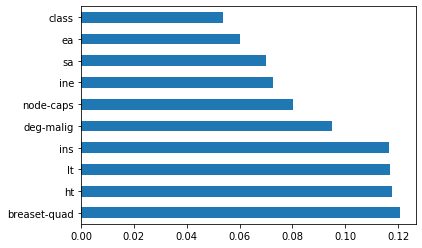

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", 
    accuracy_score(y_test,Y_pred)*100) 
      

Accuracy :  72.41379310344827


C:\Users\sande\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(X_train,y_train)
y_pred1=clf1.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 


[[42  3]
 [13  0]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        45
           1       0.00      0.00      0.00        13

    accuracy                           0.72        58
   macro avg       0.38      0.47      0.42        58
weighted avg       0.59      0.72      0.65        58

Accuracy :  72.41379310344827


C:\Users\sande\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
model =tf.keras.models.Sequential([
          tf.keras.layers.Dense(64,activation='relu',input_shape=(12,)),
          tf.keras.layers.Dense(128,activation='relu'),
          tf.keras.layers.Dense(128,activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
model.fit(X_train, y_train,epochs = 100,batch_size=32,verbose=2)

Train on 228 samples
Epoch 1/100
228/228 - 0s - loss: 2.2700 - accuracy: 0.6009
Epoch 2/100
228/228 - 0s - loss: 1.0910 - accuracy: 0.7018
Epoch 3/100
228/228 - 0s - loss: 1.2561 - accuracy: 0.5614
Epoch 4/100
228/228 - 0s - loss: 0.8834 - accuracy: 0.7368
Epoch 5/100
228/228 - 0s - loss: 0.7348 - accuracy: 0.7193
Epoch 6/100
228/228 - 0s - loss: 0.7594 - accuracy: 0.7412
Epoch 7/100
228/228 - 0s - loss: 0.7017 - accuracy: 0.7193
Epoch 8/100
228/228 - 0s - loss: 0.5989 - accuracy: 0.7456
Epoch 9/100
228/228 - 0s - loss: 0.6489 - accuracy: 0.6711
Epoch 10/100
228/228 - 0s - loss: 0.6032 - accuracy: 0.7368
Epoch 11/100
228/228 - 0s - loss: 0.5731 - accuracy: 0.7456
Epoch 12/100
228/228 - 0s - loss: 0.5842 - accuracy: 0.7193
Epoch 13/100
228/228 - 0s - loss: 0.5392 - accuracy: 0.7544
Epoch 14/100
228/228 - 0s - loss: 0.5685 - accuracy: 0.7412
Epoch 15/100
228/228 - 0s - loss: 0.5518 - accuracy: 0.7105
Epoch 16/100
228/228 - 0s - loss: 0.5170 - accuracy: 0.7719
Epoch 17/100
228/228 - 0s - 

In [19]:
y_pred= model.evaluate(X_test,y_test)


58/58 [==============================] - 0s 992us/sample - loss: 0.4724 - accuracy: 0.7759
